# DeepLabV3+ Transfer Learning Inference Demo

DeepLabV3+ with interchangeable backbone transfer learning inference demo
Net pretrained with COCO val2017, then trained with Yamaha-CMU Off-Road Dataset

See: https://pytorch.org/hub/pytorch_vision_deeplabv3_resnet101/

---

Author: **Nate Haddad** nhaddad2112[at]gmail[dot]com

In [1]:
import os.path as op
import sys

import torch
import numpy as np
from PIL import Image
import yaml

sys.path.append('..')
from utils import vis_segmentation, display_example_pair, vis_grid_4x3, run_inference

In [2]:
torch.cuda.is_available()

True

In [3]:
np.random.seed(42)

In [5]:
with open('../config/config.yaml', 'r') as f:
    config = yaml.safe_load(f)

Visualize an example pair from the dataset. We will run inference on this image

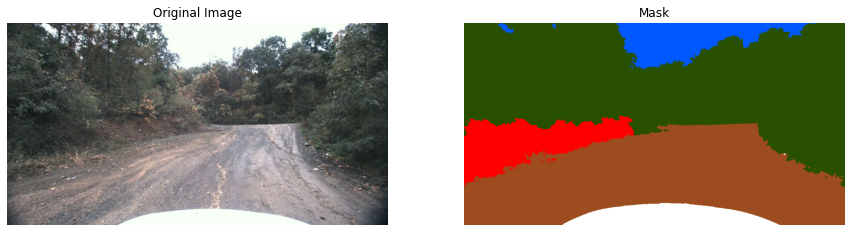

In [5]:
data_path = op.join('..', config['DATA_PATH'])
example_image = Image.open(op.join(data_path, 'train/iid000008/rgb.jpg'))
example_mask = Image.open(op.join(data_path, 'train/iid000008/labels.png'))
image_display = np.array(example_image)
mask_display = np.array(example_mask.convert('RGB'))
display_example_pair(image_display, mask_display)

Load a previously trained model and run the image through it

In [6]:
model = torch.load(op.join('..', config['LOAD_MODEL_PATH']))
model.eval();

In [11]:
data_path = op.join('..', config['DATA_PATH'])
example_image = Image.open(op.join(data_path, '1721396039_Camera0_visible.png'))

In [7]:
predicted_masks = run_inference(model, example_image)


NameError: name 'example_image' is not defined

Finally, we take the orginal example image, and using the segmentation map, a custom color map for our labels, and the label names, overlay the segmentation map and create a key for each of the classes

IndexError: index 11 is out of bounds for axis 0 with size 8

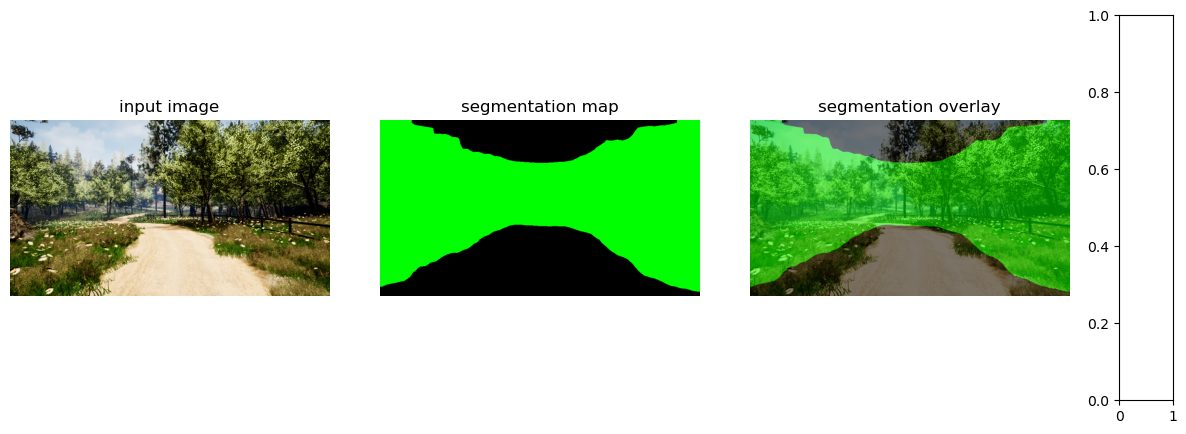

In [13]:
vis_segmentation(example_image, np.array(predicted_masks))

More example output, taken from our paper

In [14]:
vis_grid_4x3(model, data_path)

ValueError: not enough values to unpack (expected 2, got 0)

In [10]:
import glob
from PIL import Image
from utils import label_to_color_image

with open('../config/config.yaml', 'r') as f:
        config = yaml.safe_load(f)

output_dir = '/home/pdhegde/semantic-segmentation/out'

def generate_inference(config, output_dir):
        model = torch.load(op.join('..', config['LOAD_MODEL_PATH']))
        model.eval()
        data_path = op.join('..', config['DATA_PATH'])
        image_extensions = ('*.jpg', '*.jpeg', '*.png', '*.bmp', '*.gif', '*.tiff')
        image_list = []
        for ext in image_extensions:
                image_list.extend(glob.glob(op.join(data_path, ext)))
        for img_path in image_list:
       
                current_image = Image.open(img_path)
                predicted_masks = run_inference(model, current_image)
                #print("Predicted masks unique values:", np.unique(predicted_masks))
                
                seg_img = get_seg_image(np.array(predicted_masks))
        
                # Construct output path and save the image
                output_path = op.join(output_dir, op.basename(img_path))
                seg_img = Image.fromarray(seg_img)
                seg_img.save(output_path)
                print(f"Saved output to {output_path}")

def get_seg_image(seg_map):
        label_names = np.asarray([
                'non-traversable', 'rough trail', 'smooth trail', 'traversable grass',
                'low vegetation', 'obstacle', 'high vegetation', 'sky'
        ])
        full_label_map = np.arange(len(label_names)).reshape(len(label_names), 1)
        full_color_map = label_to_color_image(full_label_map)
        seg_image = label_to_color_image(seg_map).astype(np.uint8)

        return seg_image




In [11]:
generate_inference(config, output_dir)

Saved output to /home/pdhegde/semantic-segmentation/out/1724325636_Camera0_visible.png
Saved output to /home/pdhegde/semantic-segmentation/out/1724327511_Camera0_visible.png
Saved output to /home/pdhegde/semantic-segmentation/out/1724237370_Camera0_visible.png
Saved output to /home/pdhegde/semantic-segmentation/out/1721396432_Camera0_visible.png
Saved output to /home/pdhegde/semantic-segmentation/out/1724163585_Camera0_visible.png
Saved output to /home/pdhegde/semantic-segmentation/out/1724325094_Camera0_visible.png
Saved output to /home/pdhegde/semantic-segmentation/out/1724163939_Camera0_visible.png
Saved output to /home/pdhegde/semantic-segmentation/out/1721397842_Camera0_visible.png
Saved output to /home/pdhegde/semantic-segmentation/out/1724157324_Camera0_visible.png
Saved output to /home/pdhegde/semantic-segmentation/out/1721398140_Camera0_visible.png
Saved output to /home/pdhegde/semantic-segmentation/out/1721394044_Camera0_visible.png
Saved output to /home/pdhegde/semantic-segm

KeyboardInterrupt: 